In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Q1)

In [2]:
@njit 
def RD(N, L):
    """Random Deposition

    Args:
        N (int): nnumber of particle
        L (int): size of the system

    Returns:
        1d_array: roughness
    """
    h = np.zeros(L)
    h_mean = np.empty(N)
    w = np.empty(N)

    for t in range(N):
        i = np.random.randint(L)
        h[i] += 1
        h_mean[t] = np.mean(h)
        w[t] = np.sqrt(np.sum((h - h_mean[t])**2) / L)

    return w

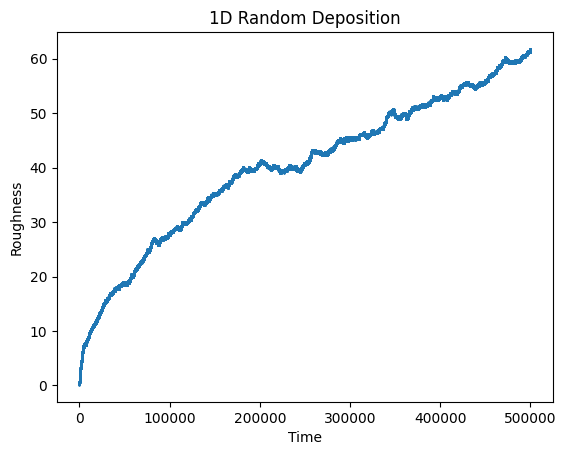

In [3]:
N = 500000  
L = 128
w = RD(N, L)

plt.scatter(range(N), w, marker='.', s=1)

plt.xlabel("Time")
plt.ylabel("Roughness")
plt.title('1D Random Deposition')
plt.show()

# Q2)

In [4]:
def RDR(N, L):
    """2D Random depostion with relaxation 

    Args:
        N (int): nnumber of particle
        L (int): size of the system

    Returns:
        1d_array: roughness
    """
    h = np.zeros((L, L))
    h_mean = np.empty(N)
    w = np.empty(N)

    for t in range(N):
        i = np.random.randint(L)
        j = np.random.randint(L)

        neighbors = np.array([h[(i - 1) % L][j], h[(i + 1) % L][j], h[i][(j - 1) % L], h[i][(j + 1) % L], h[i][j]])
        arg = np.where(neighbors == neighbors.min())[0]
        arg = np.random.choice(arg,1)

        if arg == 0:
            h[(i - 1) % L][j] += 1
        elif arg == 1:
            h[(i + 1) % L][j] += 1
        elif arg == 2:
            h[i][(j - 1) % L] += 1
        elif arg == 3:
            h[i][(j + 1) % L] += 1
        else:
            h[i][j] += 1

        h_mean[t] = np.mean(h)
        w[t] = np.sqrt(np.sum((h - h_mean[t])**2) / (L**2))

    return w

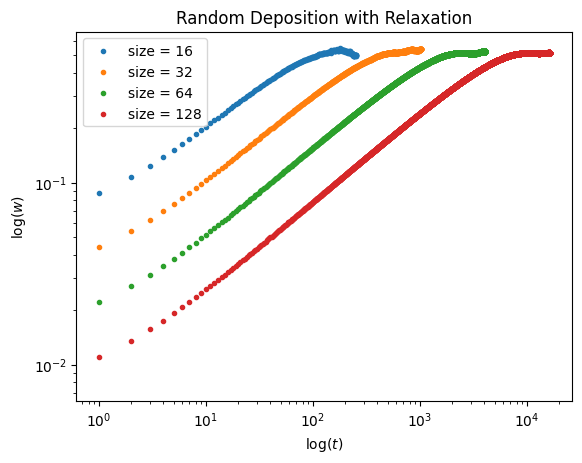

In [5]:
for L in [16, 32, 64, 128]:
    w = RDR(L**2, L)
    plt.scatter(range(L**2), w, marker='.', label=f"size = {L}")

plt.loglog()
plt.xlabel(r"$\log(t)$")
plt.ylabel(r"$\log(w)$")
plt.title('Random Deposition with Relaxation')
plt.legend()
plt.show()

# Q3)

In [6]:
@njit
def BD(N, L):
    """2D Ballistic Deposition (KPZ)

    Args:
        N (int): nnumber of particle
        L (int): size of the system

    Returns:
        1d_array: roughness
    """
    h = np.zeros((L, L))
    h_mean = np.empty(N)
    w = np.empty(N)

    for t in range(N):
        i = np.random.randint(L)
        j = np.random.randint(L)
        h[i][j] = max([h[(i - 1) % L][j], h[(i + 1) % L][j], h[i][(j - 1) % L], h[i][(j + 1) % L], h[i][j] + 1])
        h_mean[t] = np.mean(h)
        w[t] = np.sqrt(np.sum((h - h_mean[t])**2)/(L**2))

    return w

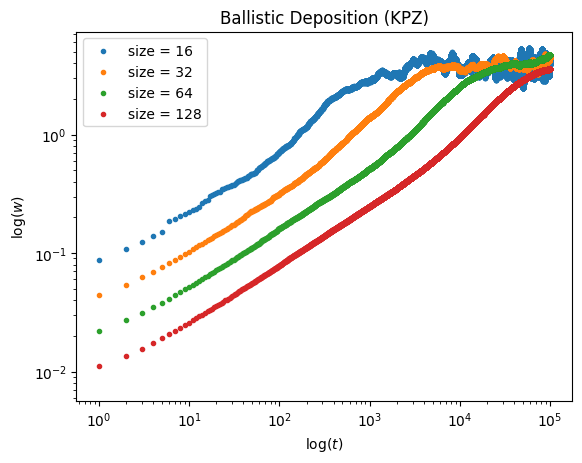

In [7]:
for L in [16, 32, 64, 128]:
    N = 100000
    w = BD(N, L)
    plt.scatter(range(N), w, marker='.', label=f"size = {L}")

plt.loglog()
plt.xlabel(r"$\log(t)$")
plt.ylabel(r"$\log(w)$")
plt.title('Ballistic Deposition (KPZ)')
plt.legend()
plt.show()